In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

%cd My\ Drive/Master\ in\ Information\ Health\ Engineering/Master\ Thesis/data/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
SOURCE_DIR = '../../data'

In [3]:
N_EXPERIMENTS = 7
N_CELLS = 8

df_ls = []
for i in range(N_EXPERIMENTS):
    target_df = pd.read_excel(SOURCE_DIR + '/0{}-12022021.xlsx'.format(i + 1), sheet_name='ForceCells', usecols=[i for i in range(N_CELLS * 3)])

    df_ls.append(target_df)

target_df = pd.concat(df_ls, axis=0)
target_df

,F1x,F1y,F1z,F2x,F2y,F2z,F3x,F3y,F3z,F4x,...,F5z,F6x,F6y,F6z,F7x,F7y,F7z,F8x,F8y,F8z
0,-7.771324,0.171571,14.460727,11.11911,-4.472346,5.492449,-2.759316,-51.5282,56.726736,-4.594232,...,53.169685,-1.002080,-7.185466,0.367752,-34.659436,-12.789365,-6.902369,4.761064,27.460388,61.4680
1,-7.759988,0.209588,14.460727,11.18170,-4.532164,5.488628,-2.759316,-51.5636,56.739352,-4.552880,...,53.221163,-0.939204,-7.202005,0.348367,-34.741342,-12.837345,-6.982784,4.857370,27.436092,61.5192
2,-7.759988,0.209588,14.460727,11.18170,-4.532164,5.488628,-2.759316,-51.5636,56.739352,-4.552880,...,53.221163,-0.939204,-7.202005,0.348367,-34.741342,-12.837345,-6.982784,4.857370,27.436092,61.5192
3,-7.811000,0.160709,14.427328,11.11342,-4.472346,5.530659,-2.890736,-51.5400,56.714120,-4.539096,...,53.309411,-0.996364,-7.224057,0.359998,-34.673087,-12.825350,-6.838037,4.843612,27.338908,61.4424
4,-7.811000,0.160709,14.427328,11.11342,-4.472346,5.530659,-2.890736,-51.5400,56.714120,-4.539096,...,53.309411,-0.996364,-7.224057,0.359998,-34.673087,-12.825350,-6.838037,4.843612,27.338908,61.4424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,-14.595596,-3.070736,20.249887,20.01827,-23.798998,0.429624,-8.278956,-43.6694,37.235016,0.326656,...,86.141344,-10.599244,-0.613970,41.336011,-14.633419,-12.405525,-1.289402,-12.078728,17.790580,29.0072
17996,-14.595596,-3.070736,20.249887,20.01827,-23.798998,0.429624,-8.278956,-43.6694,37.235016,0.326656,...,86.141344,-10.599244,-0.613970,41.336011,-14.633419,-12.405525,-1.289402,-12.078728,17.790580,29.0072
17997,-14.204504,-2.896944,20.108869,19.90447,-22.852786,-0.048001,-7.845270,-42.7726,37.878432,-0.638224,...,86.064127,-10.770724,-1.159757,41.413551,-14.551513,-12.513480,-2.013137,-11.913632,17.741988,29.0072
17998,-14.204504,-2.896944,20.108869,19.90447,-22.852786,-0.048001,-7.845270,-42.7726,37.878432,-0.638224,...,86.064127,-10.770724,-1.159757,41.413551,-14.551513,-12.513480,-2.013137,-11.913632,17.741988,29.0072


In [4]:
def rotate_vector(v, axis, angle):
    if axis == 0:
        # X
        v = v.dot(np.array([[1, 0, 0], [0, np.cos(np.radians(angle)), np.sin(np.radians(angle))], [0, np.sin(np.radians(angle)), np.cos(np.radians(angle))]]))
    elif axis == 1:
        # Y
        v = v.dot(np.array([[np.cos(np.radians(angle)), 0, np.sin(np.radians(angle))], [0, 1, 0], [-np.sin(np.radians(angle)), 0, np.cos(np.radians(angle))]]))
    elif axis == 2:
        # Z
        v = v.dot(np.array([[np.cos(np.radians(angle)), -np.sin(np.radians(angle)), 0], [np.sin(np.radians(angle)), np.cos(np.radians(angle)), 0], [0, 0, 1]]))
    else:
        raise ValueError('Invalid axis')

    return pd.Series(v)
    
rotations = {
    1: [180, 90, 0],
    2: [180, 90, 0],
    3: [180, 0, -90],
    4: [0, 0, -90],
    5: [0, 0, 0],
    6: [0, 180, 0],
    7: [0, 90, 0],
    8: [0, 0, 90],
}

for i in range (1, N_CELLS + 1):
    cols = ['F{}x'.format(str(i)), 'F{}y'.format(str(i)), 'F{}z'.format(str(i))]
    for ax in range(3):
        target_df[cols] = target_df[cols].apply(lambda v: rotate_vector(v, ax, rotations[i][ax]), axis=1)


In [5]:
df_ls = []
for i in range(N_EXPERIMENTS):
    features_df = pd.read_excel(SOURCE_DIR + '/0{}-12022021.xlsx'.format(i + 1), sheet_name='H3processed')

    df_ls.append(features_df)

features_df = pd.concat(df_ls, axis=0)
features_df

,LHipPos,LKneePos,LAnklePos,LHipVel,LKneeVel,LAnkleVel,LHipAcc,LKneeAcc,LAnkleAcc,RHipPos,RKneePos,RAnklePos,LHipTorque,LKneeTorque,LankleTorque,RHipTorque,RKneeTorque,RankleTorque
0,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,-4.000000,5.000000,-3.000000,-2.000000,0.000000e+00,3.00000
1,3.464420e-09,-5.208698e-07,0.000001,-2.993268e-07,-0.000002,0.000001,0.000003,0.000012,0.000016,0.000073,3.898969e-08,-0.000001,-4.045265,5.000000,-3.000000,-2.000000,-2.254066e-08,3.00000
2,5.574126e-09,-1.041740e-06,0.000003,-6.112218e-07,-0.000003,0.000002,0.000006,0.000025,0.000034,0.000150,8.321518e-08,-0.000003,-4.107567,5.000000,-3.000000,-2.000000,-4.508133e-08,3.00000
3,6.241208e-09,-1.562609e-06,0.000004,-9.357570e-07,-0.000005,0.000004,0.000009,0.000037,0.000054,0.000232,1.333795e-07,-0.000004,-4.193318,5.000000,-3.000000,-2.000000,-6.762199e-08,3.00000
4,5.372052e-09,-2.083479e-06,0.000006,-1.273151e-06,-0.000006,0.000006,0.000012,0.000050,0.000078,0.000320,1.902802e-07,-0.000005,-4.311344,5.000000,-3.000000,-2.000000,-9.016266e-08,3.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,-1.373360e+00,3.266387e+01,-10.642693,9.492323e+00,32.974894,1.180972,-77.099439,-217.188013,98.099878,9.527230,4.749935e-05,10.632719,11.293884,-2.341665,-1.272643,-3.329087,6.302949e+00,1.01119
17996,-1.292214e+00,3.299650e+01,-10.600492,8.670582e+00,30.555430,2.108336,-72.028060,-215.727398,84.344801,9.444592,4.364293e-05,10.660637,11.058475,-2.325128,-1.372874,-2.324577,6.221970e+00,1.01119
17997,-1.224087e+00,3.329346e+01,-10.552311,7.931642e+00,28.204787,2.859098,-66.774378,-211.859988,71.952823,9.371637,4.047814e-05,10.683548,10.829307,-2.264902,-1.511467,-1.507751,6.163975e+00,1.01119
17998,-1.168711e+00,3.354756e+01,-10.497383,7.299510e+00,26.049671,3.444467,NaN,NaN,NaN,9.308075,3.795468e-05,10.701816,10.582794,-2.154789,-1.676954,-0.845999,6.122996e+00,1.01119


In [ ]:
feature_names = features_df.columns
target_names = target_df.columns
del target_df, features_df
gc.collect()

In [6]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.multioutput import MultiOutputRegressor

In [7]:
LEG = 'L'
X = features_df[[f for f in features_df.columns if f[0] == LEG]]

In [8]:
Y = target_df['F7z']

In [9]:
idx = features_df.notna().all(axis=1)
X = X.loc[idx].values
Y = Y.loc[idx].values

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(88190, 12) (88190,)
(37796, 12) (37796,)


In [12]:
scaler = StandardScaler().fit(X_train)

X_train_norm = scaler.transform(X_train)
X_test_norm =  scaler.transform(X_test)

In [13]:
import gc
param_grid = {}
#     'n_estimators': [10, 20, 50, 100, 500],
#     'criterion': ['mse', 'mae'],
#     'max_depth': [1, 2, 5, 10],

# }

target = 'F7z'
rf = RandomForestRegressor(random_state=0)

clf = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
clf.fit(X_train_norm, Y_train)

#print('Best params: {}'.format(clf.best_params_))


test_preds = clf.best_estimator_.predict(X_test_norm)

print('{} train MAE: {}'.format(target, mean_absolute_error(Y_train, clf.best_estimator_.predict(X_train_norm))))
print('{} train MSE: {}'.format(target, mean_squared_error(Y_train, clf.best_estimator_.predict(X_train_norm))))
print('{} train R2: {}'.format(target, r2_score(Y_train, clf.best_estimator_.predict(X_train_norm))))

print('{} test MAE: {}'.format(target, mean_absolute_error(Y_test, test_preds)))
print('{} test MSE: {}'.format(target, mean_squared_error(Y_test, test_preds)))
print('{} test R2: {}'.format(target, r2_score(Y_test, test_preds)))
    
gc.collect()

F7z train MAE: 0.9774614085812451
F7z train MSE: 2.6127147238284367
F7z train R2: 0.9875934014755661
F7z test MAE: 2.641475470692666
F7z test MSE: 18.973197567608217
F7z test R2: 0.9099040804638603


232

In [14]:
feature_importances = pd.DataFrame({'feature': [f for f in features_df.columns if f[0] == LEG], 
                                    'importance': clf.best_estimator_.feature_importances_}
                                  ).sort_values('importance', ascending=False)

feature_importances

,feature,importance
3,LHipVel,0.237485
11,LankleTorque,0.145865
10,LKneeTorque,0.110450
0,LHipPos,0.079928
9,LHipTorque,0.079100
6,LHipAcc,0.076124
2,LAnklePos,0.063293
4,LKneeVel,0.055303
1,LKneePos,0.054945
7,LKneeAcc,0.046427


<Figure size 1440x1080 with 0 Axes>

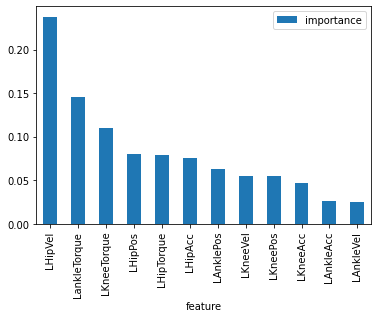

In [15]:
plt.figure(figsize=(20,15))
ax = feature_importances.plot.bar(x='feature', y='importance', rot=90)
plt.show()

In [23]:
feature_importance_idx = np.absolute(clf.best_estimator_.feature_importances_).argsort()[::-1]

train_mae_ls = []
train_mse_ls = []
train_r2_ls = []
test_mae_ls = []
test_mse_ls = []
test_r2_ls = []

for f in range(len(feature_importances), 0, -1):
    fi_idx = feature_importance_idx[:f]
    
    target = str(len(fi_idx))
    rf = RandomForestRegressor(random_state=0)

    clf = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    clf.fit(X_train_norm[:, fi_idx], Y_train)

    #print('Best params: {}'.format(clf.best_params_))


    test_preds = clf.best_estimator_.predict(X_test_norm[:, fi_idx])

    print('{} train MAE: {}'.format(target, mean_absolute_error(Y_train, clf.best_estimator_.predict(X_train_norm[:, fi_idx]))))
    print('{} train MSE: {}'.format(target, mean_squared_error(Y_train, clf.best_estimator_.predict(X_train_norm[:, fi_idx]))))
    print('{} train R2: {}'.format(target, r2_score(Y_train, clf.best_estimator_.predict(X_train_norm[:, fi_idx]))))

    print('{} test MAE: {}'.format(target, mean_absolute_error(Y_test, test_preds)))
    print('{} test MSE: {}'.format(target, mean_squared_error(Y_test, test_preds)))
    print('{} test R2: {}'.format(target, r2_score(Y_test, test_preds)))

    train_mae_ls.append(mean_absolute_error(Y_train, clf.best_estimator_.predict(X_train_norm[:, fi_idx])))
    train_mse_ls.append(mean_squared_error(Y_train, clf.best_estimator_.predict(X_train_norm[:, fi_idx])))
    train_r2_ls.append(r2_score(Y_train, clf.best_estimator_.predict(X_train_norm[:, fi_idx])))
    test_mae_ls.append(mean_absolute_error(Y_test, test_preds))
    test_mse_ls.append(mean_squared_error(Y_test, test_preds))
    test_r2_ls.append(r2_score(Y_test, test_preds))
    gc.collect()

12 train MAE: 0.9775007641402652
12 train MSE: 2.614941001074443
12 train R2: 0.987582829893547
12 test MAE: 2.641917192290454
12 test MSE: 18.99490853652075
12 test R2: 0.9098009839931033
11 train MAE: 0.9761720817700416
11 train MSE: 2.5908570411787797
11 train R2: 0.987697193707774
11 test MAE: 2.637981080518044
11 test MSE: 18.924588365515
11 test R2: 0.9101349055920391
10 train MAE: 0.999650054181993
10 train MSE: 2.7041332480515665
10 train R2: 0.9871592963214945
10 test MAE: 2.69820462540454
10 test MSE: 19.64826267953277
10 test R2: 0.9066984736182622
9 train MAE: 0.9963108106144232
9 train MSE: 2.6941466362503834
9 train R2: 0.9872067182164709
9 test MAE: 2.6957962872060537
9 test MSE: 19.754017482485292
9 test R2: 0.9061962875116021
8 train MAE: 1.023715123200582
8 train MSE: 2.8968730914930587
8 train R2: 0.9862440621264129
8 test MAE: 2.7532978380064024
8 test MSE: 20.802295149121868
8 test R2: 0.9012184475893497
7 train MAE: 1.081013007216759
7 train MSE: 3.242401875888923

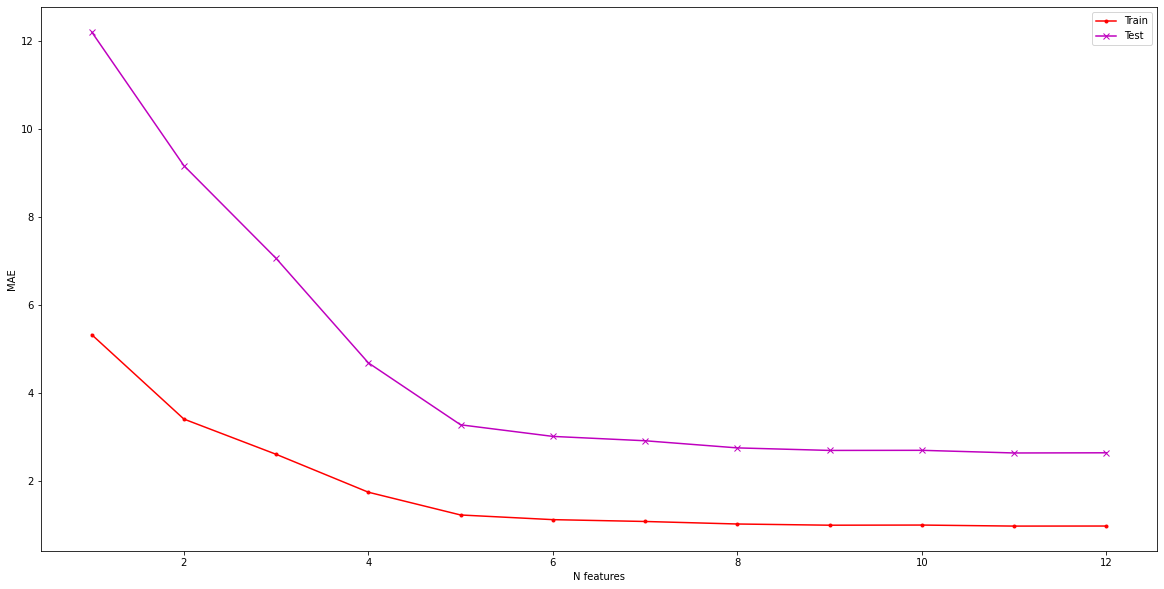

In [27]:
plt.figure(figsize=(20,10))
plt.plot(range(len(feature_importances), 0, -1), train_mae_ls, color='r', marker='.', label='Train')
plt.plot(range(len(feature_importances), 0, -1), test_mae_ls, color='m', marker='x', label='Test')
plt.xlabel('N features')
plt.ylabel('MAE')
plt.legend()
plt.show()

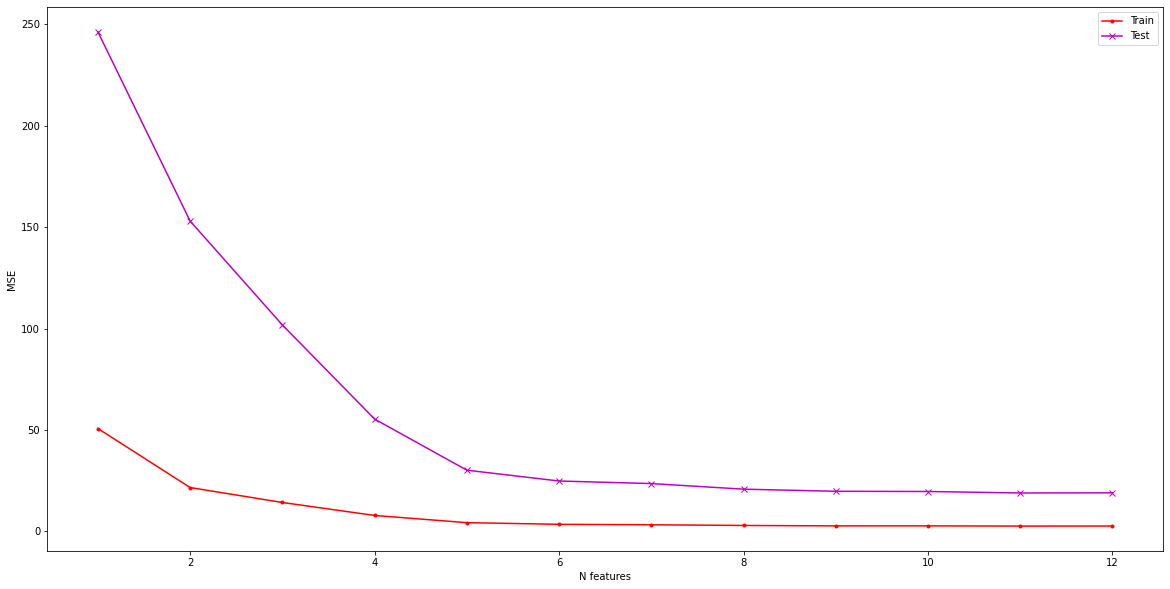

In [28]:
plt.figure(figsize=(20,10))
plt.plot(range(len(feature_importances), 0, -1), train_mse_ls, color='r', marker='.', label='Train')
plt.plot(range(len(feature_importances), 0, -1), test_mse_ls, color='m', marker='x', label='Test')
plt.xlabel('N features')
plt.ylabel('MSE')
plt.legend()
plt.show()

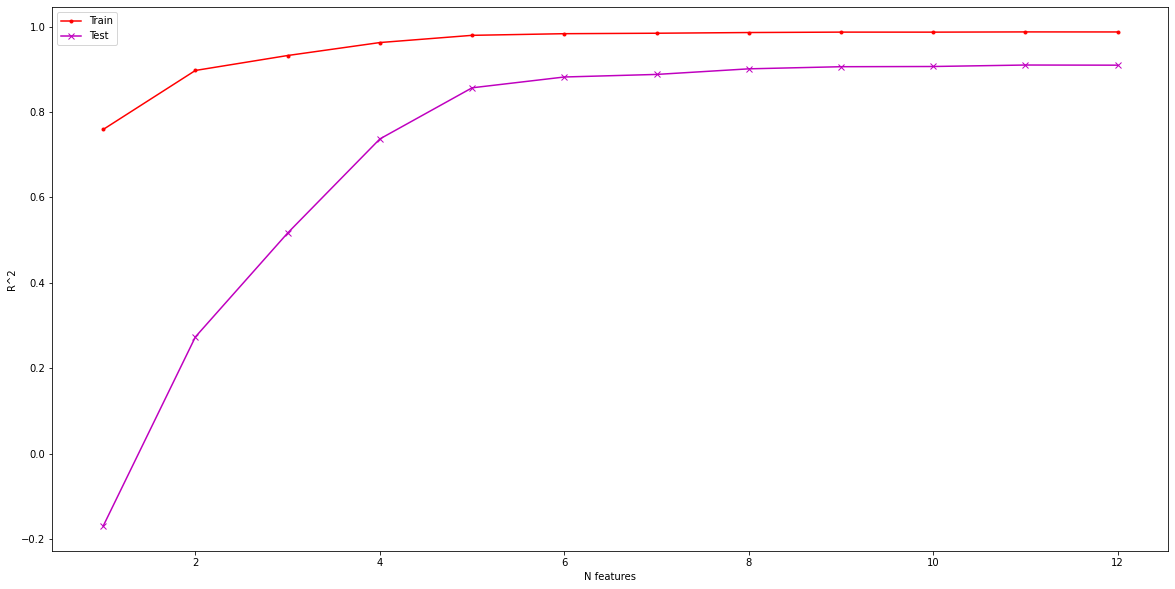

In [29]:
plt.figure(figsize=(20,10))
plt.plot(range(len(feature_importances), 0, -1), train_r2_ls, color='r', marker='.', label='Train')
plt.plot(range(len(feature_importances), 0, -1), test_r2_ls, color='m', marker='x', label='Test')
plt.xlabel('N features')
plt.ylabel('R^2')
plt.legend()
plt.show()